# Task 1: Data Science & Business Analytics Internship by The Sparks      Foundation by Jainam Shah
## Prediction Using Supervised ML.
### Predict Percentage of student based on number of study hours.

In [180]:
#Importing Libraries 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


##### Reading Data from URL provided

In [202]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)

In [182]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [183]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Data Visualization

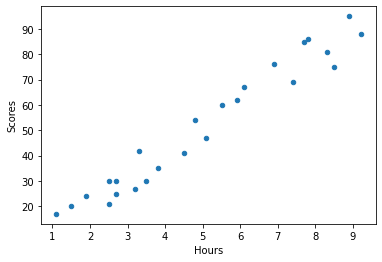

In [200]:
data.plot(kind='scatter', x='Hours', y='Scores');
plt.show()

In [186]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [187]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [188]:
hours = data['Hours']
scores = data['Scores']

C:\Users\Jainam Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

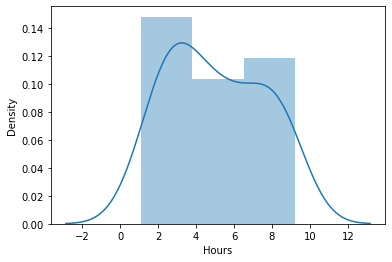

In [189]:
sns.distplot(hours)

C:\Users\Jainam Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

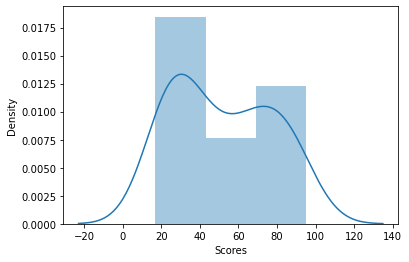

In [190]:
sns.distplot(scores)

#### Linear Regression Model

In [191]:
X = data.iloc[:, :-1].values
Y = data.iloc[:,1].values

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [193]:
from sklearn.linear_model import LinearRegression
reg_model=LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

#### Linear Regression Model Visualization

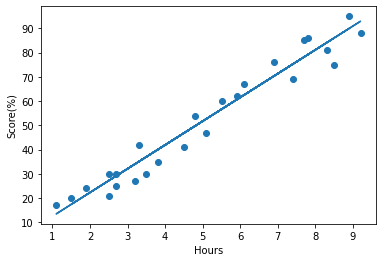

In [194]:
m=reg_model.coef_
c=reg_model.intercept_
slope=m*X+c
plt.scatter(X, Y);
plt.plot(X, slope)
plt.xlabel("Hours")
plt.ylabel("Score(%)")
plt.show()

#### Predictive Model

In [195]:
Y_pred = reg_model.predict(X_test)

In [196]:
act_pred = pd.DataFrame({'Target':y_test, 'Predicted':Y_pred})
act_pred

,Target,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


In [197]:
hrs = 9.25
scr = reg_model.predict([[hrs]])
print("If a student studies {} hours a day, he will achieve score of {} % in exams." .format(hrs, scr))

If a student studies 9.25 hours a day, he will achieve score of [93.43229054] % in exams.


In [198]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, Y_pred))
print("R2 Score ", r2_score(y_test, Y_pred))

Mean Absolute Error:  5.632881746692995
R2 Score  0.6683995499740194
